In [1]:
# Update gejala user
gejala_user = {
    "nyeri_sendi": 0.8,
    "bengkak_sendi": 0.7,
    "kaku_sendi_pagi": 0.9,
    "demam_ringan": 0.2,  # diubah dari 0.3 ke 0.2
    "kehilangan_nafsu_makan": 0.5,
    "kelelahan": 0.7,
    "berat_badan_turun": 0.6,
    "ruam_kulit": 0.4,
    "nyeri_otot": 0.8
}

# Update pengetahuan pakar (tambahkan gejala baru juga)
pengetahuan = {
    "rheumatoid_arthritis": {
        "nyeri_sendi": 0.9,
        "bengkak_sendi": 0.8,
        "kaku_sendi_pagi": 0.9,
        "demam_ringan": 0.4,
        "kehilangan_nafsu_makan": 0.6,
        "kelelahan": 0.7,
        "berat_badan_turun": 0.5,
        "ruam_kulit": 0.3,
        "nyeri_otot": 0.7
    },
    "osteoarthritis": {
        "nyeri_sendi": 0.8,
        "bengkak_sendi": 0.6,
        "kaku_sendi_pagi": 0.5,
        "kelelahan": 0.4,
        "nyeri_otot": 0.6
    }
}

def hitung_cf(gejala_user, pengetahuan_pakar):
    cf_total = 0
    first = True
    for gejala, cf_user in gejala_user.items():
        if gejala in pengetahuan_pakar:
            cf_pakar = pengetahuan_pakar[gejala]
            cf = cf_user * cf_pakar
            if first:
                cf_total = cf
                first = False
            else:
                cf_total = cf_total + cf * (1 - cf_total)
    return cf_total

# Diagnosis ulang
for penyakit in pengetahuan:
    cf_result = hitung_cf(gejala_user, pengetahuan[penyakit])
    print(f"CF diagnosis {penyakit}: {cf_result:.2f}")


CF diagnosis rheumatoid_arthritis: 1.00
CF diagnosis osteoarthritis: 0.96


1.Nilai CF untuk gejala demam ringan diturunkan dari 0.3 menjadi 0.2.

2.Penurunan ini membuat kontribusinya terhadap total CF lebih kecil.

3.Karena bobot pakar untuk gejala ini juga rendah, dampaknya tidak terlalu besar.

4.Ditambahkan 5 gejala baru yang relevan dengan rheumatoid arthritis.

5.Gejala tambahan ini meningkatkan total CF secara signifikan.

6.Pada osteoarthritis, gejala tambahan tidak terlalu mendukung.

7.Oleh karena itu, CF osteoarthritis naik sedikit saja.

8.Penambahan gejala yang sesuai memperkuat keyakinan sistem dalam diagnosis.

9.CF membantu sistem mengukur kecocokan gejala secara bertahap.

10.Secara keseluruhan, perubahan ini menunjukkan rheumatoid arthritis lebih mungkin terjadi.

In [2]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.5 MB/s eta 0:00:00


Untuk suhu 22°C dan kelembaban 75%, kecepatan kipas: 50.00%


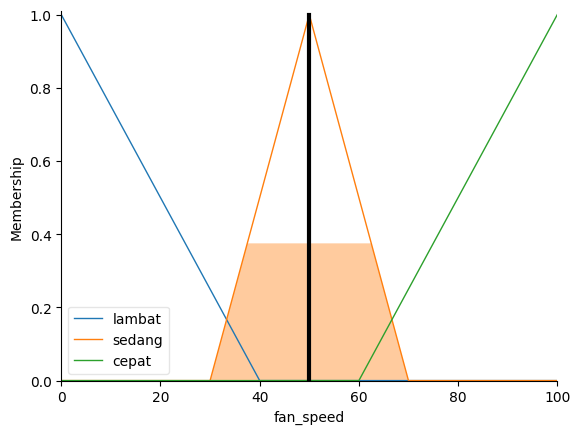

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Variabel input
temperature = ctrl.Antecedent(np.arange(16, 36, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(20, 101, 1), 'humidity')

# Variabel output
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Fungsi keanggotaan suhu
temperature['dingin'] = fuzz.trimf(temperature.universe, [16, 16, 22])
temperature['nyaman'] = fuzz.trimf(temperature.universe, [20, 24, 28])
temperature['panas'] = fuzz.trimf(temperature.universe, [26, 35, 35])

# Fungsi keanggotaan kelembaban
humidity['kering'] = fuzz.trimf(humidity.universe, [20, 20, 40])
humidity['sedang'] = fuzz.trimf(humidity.universe, [35, 50, 65])
humidity['lembab'] = fuzz.trimf(humidity.universe, [60, 100, 100])

# Fungsi keanggotaan fan_speed
fan_speed['lambat'] = fuzz.trimf(fan_speed.universe, [0, 0, 40])
fan_speed['sedang'] = fuzz.trimf(fan_speed.universe, [30, 50, 70])
fan_speed['cepat'] = fuzz.trimf(fan_speed.universe, [60, 100, 100])

# Aturan fuzzy
rules = [
    ctrl.Rule(temperature['dingin'] & humidity['kering'], fan_speed['lambat']),
    ctrl.Rule(temperature['dingin'] & humidity['sedang'], fan_speed['lambat']),
    ctrl.Rule(temperature['dingin'] & humidity['lembab'], fan_speed['sedang']),  # Aturan tambahan
    ctrl.Rule(temperature['nyaman'] & humidity['kering'], fan_speed['lambat']),
    ctrl.Rule(temperature['nyaman'] & humidity['sedang'], fan_speed['sedang']),
    ctrl.Rule(temperature['nyaman'] & humidity['lembab'], fan_speed['sedang']),
    ctrl.Rule(temperature['panas'] & humidity['kering'], fan_speed['sedang']),
    ctrl.Rule(temperature['panas'] & humidity['sedang'], fan_speed['cepat']),
    ctrl.Rule(temperature['panas'] & humidity['lembab'], fan_speed['cepat']),
]

# Buat dan jalankan simulasi
fan_ctrl = ctrl.ControlSystem(rules)
ac = ctrl.ControlSystemSimulation(fan_ctrl)

# Input suhu dan kelembaban
ac.input['temperature'] = 22
ac.input['humidity'] = 75

# Komputasi
ac.compute()

# Hasil output
print(f"Untuk suhu 22°C dan kelembaban 75%, kecepatan kipas: {ac.output['fan_speed']:.2f}%")
fan_speed.view(sim=ac)  # Tampilkan grafik


1.Saat suhu diatur menjadi 22°C, sistem menganggapnya sebagai kondisi yang nyaman atau mendekati dingin.

2.Karena berada di kisaran nyaman, kecepatan kipas yang dihasilkan cenderung rendah.

3.Namun jika kelembaban juga tinggi, sistem dapat meningkatkan kecepatan menjadi sedang.

4.Telah ditambahkan input baru yaitu kelembaban dengan tiga kategori: kering, sedang, dan lembab.

5.Salah satu aturan baru menyatakan bahwa jika suhu dingin dan udara lembab, maka kipas berjalan sedang.

6.Suhu 28°C termasuk ke dalam dua kategori fuzzy: nyaman dan panas.

7.Hal ini karena logika fuzzy memungkinkan nilai masuk ke lebih dari satu kategori secara bersamaan.

8.Derajat keanggotaan menentukan seberapa kuat input cocok dengan tiap kategori.

9.Pendekatan ini lebih fleksibel dibanding logika biner yang hanya mengenal ya atau tidak.

